In [1]:
#importing the dependencies

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
#data collection and analysis

In [7]:
#loading dataset from csv file to pandas dataframe
data=pd.read_csv('Train.csv')

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
#number of datapoints(rows) and no of features(column)

In [10]:
data.shape

(8523, 12)

In [11]:
#info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
#check missing values
[features for features in data.columns if data[features].isnull().sum()>0]

['Item_Weight', 'Outlet_Size']

In [13]:
#check missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
#handling missing values
#mean value of 'item_weight 'column
data['Item_Weight'].mean()

12.857645184136183

In [15]:
#filling the missing values in item weih]ght column with 'mean'value
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
#replacing the missing values in 'Outlet_size' with mode

In [19]:
mode_of_outlet_size=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [20]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [21]:
m_value=data['Outlet_Size'].isnull()

In [22]:
m_value.value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

In [23]:
#mode value for outlet ​size column

In [24]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [25]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
#analysis the data

In [27]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [28]:
#numerical features

In [29]:
#item weight distribution

C:\Users\shivam\anaconda5\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


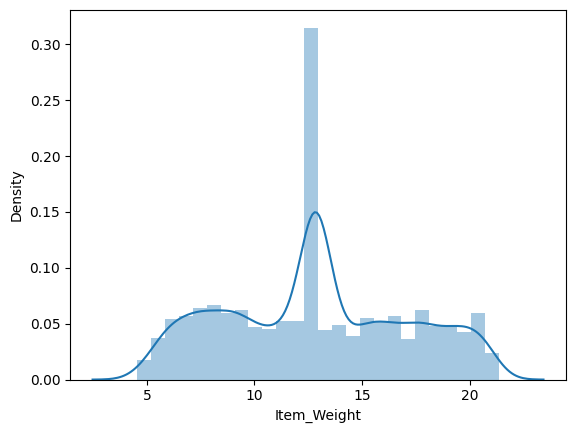

In [30]:

sns.distplot(data['Item_Weight'])
plt.show()

C:\Users\shivam\anaconda5\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Item_Weight'>

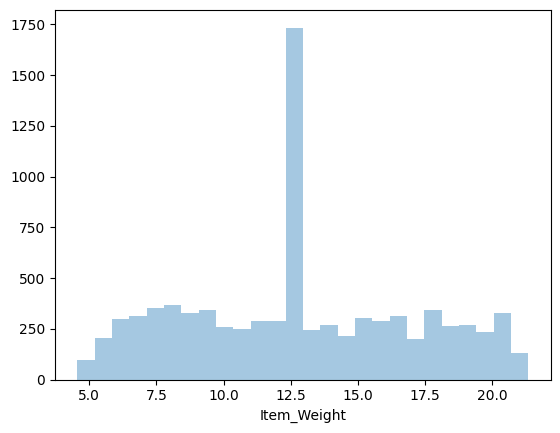

In [31]:
sns.distplot(data['Item_Weight'],kde=False)

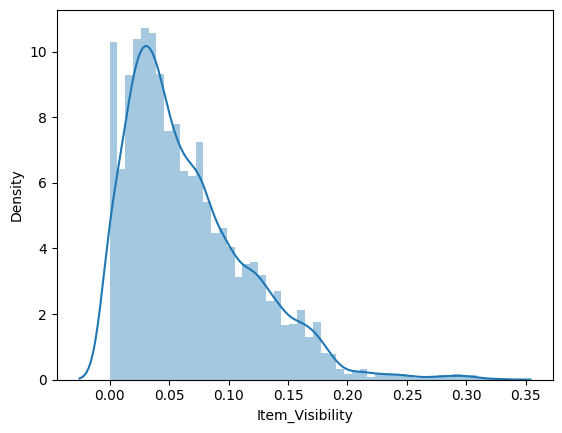

In [32]:

sns.distplot(data['Item_Visibility'])
plt.show()

C:\Users\shivam\anaconda5\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


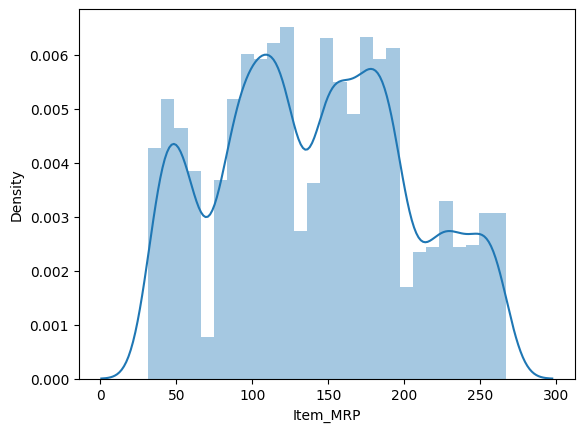

In [33]:

sns.distplot(data['Item_MRP'])
plt.show()

C:\Users\shivam\anaconda5\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


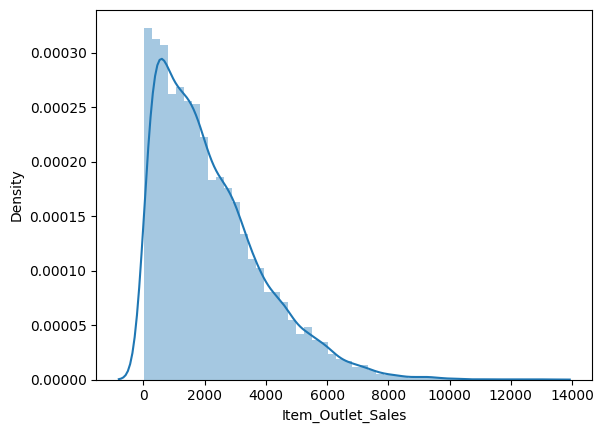

In [34]:

sns.distplot(data['Item_Outlet_Sales'])
plt.show()

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='count'>

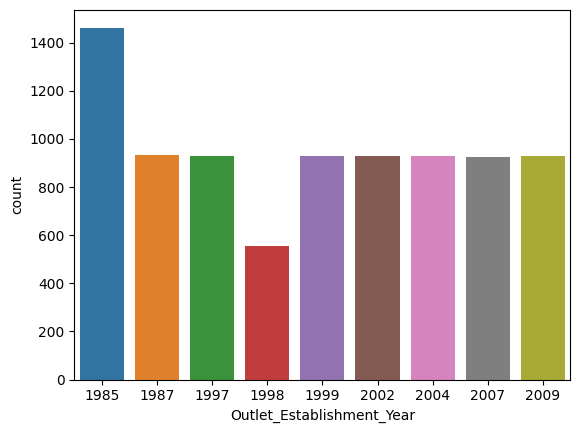

In [35]:
sns.countplot(x='Outlet_Establishment_Year',data=data)

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

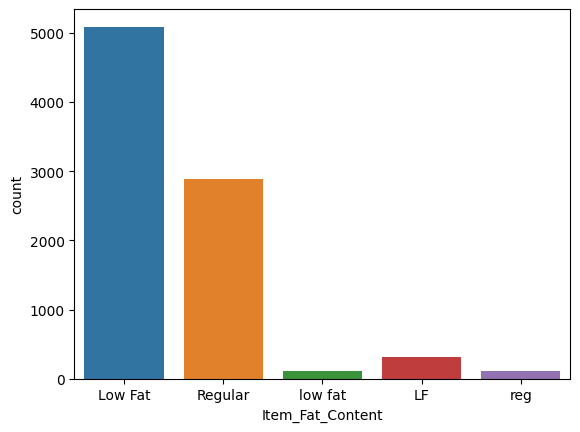

In [36]:
#categorical features
sns.countplot(x='Item_Fat_Content',data=data)

<AxesSubplot: xlabel='Outlet_Size', ylabel='count'>

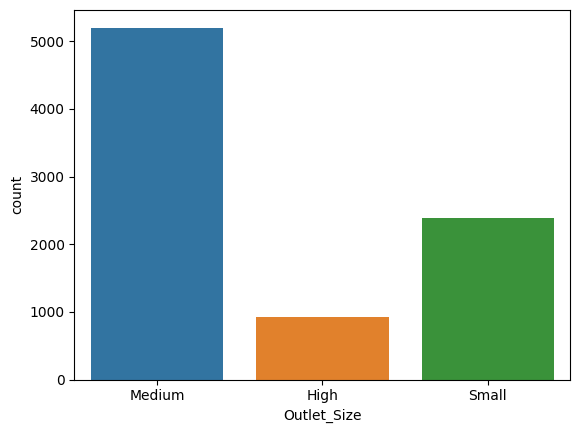

In [37]:
sns.countplot(x='Outlet_Size',data=data)

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='count'>

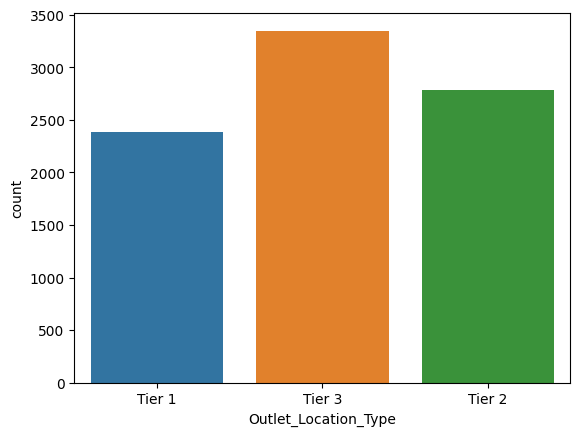

In [38]:
sns.countplot(x='Outlet_Location_Type',data=data)

<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

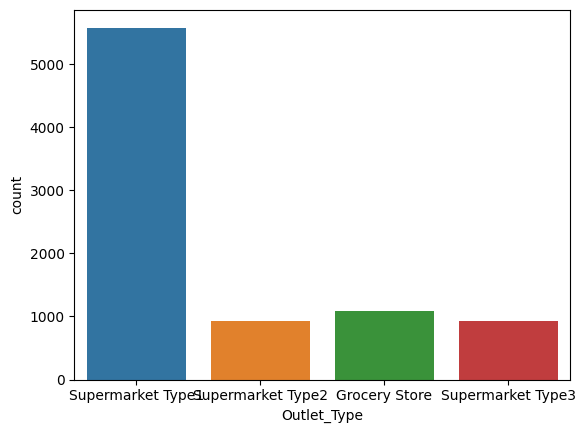

In [40]:
sns.countplot(x='Outlet_Type',data=data)

<AxesSubplot: xlabel='Item_Type', ylabel='count'>

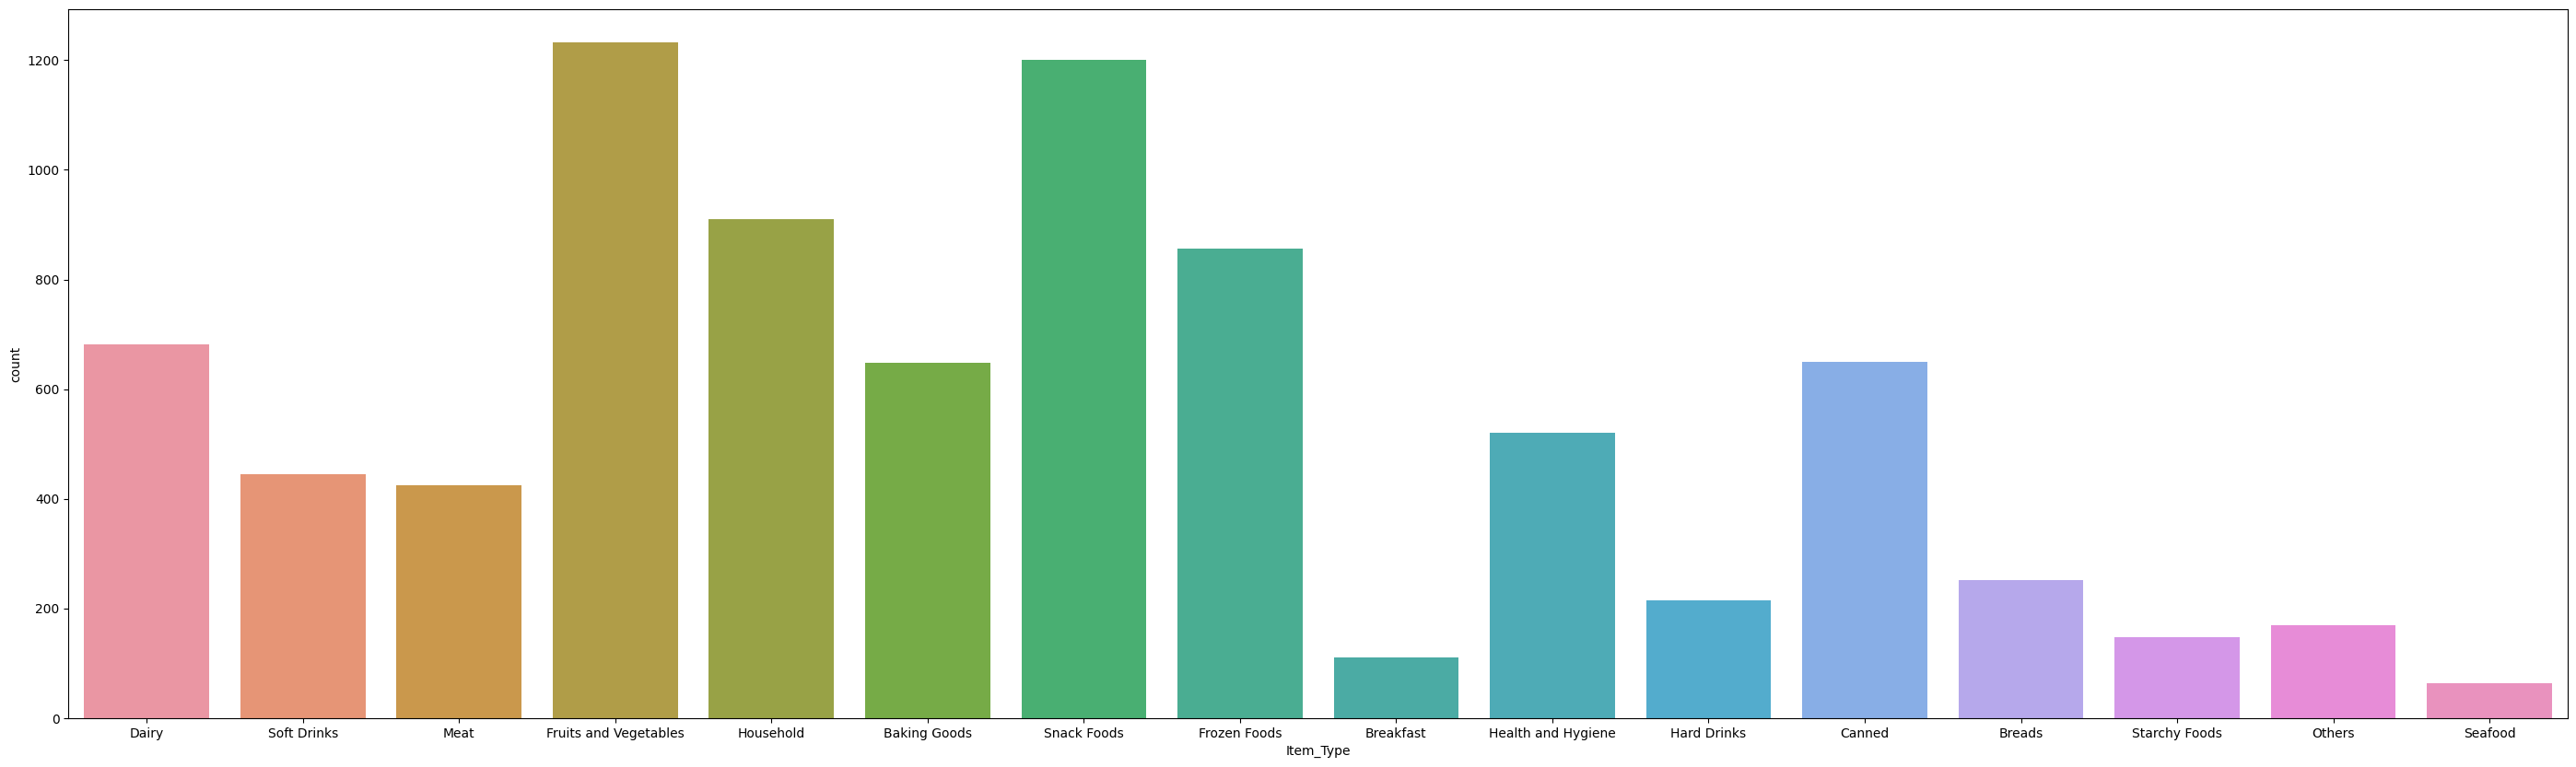

In [41]:
plt.figure(figsize=(35,10))
sns.countplot(x='Item_Type',data=data)

#  correlation matrix

<AxesSubplot: >

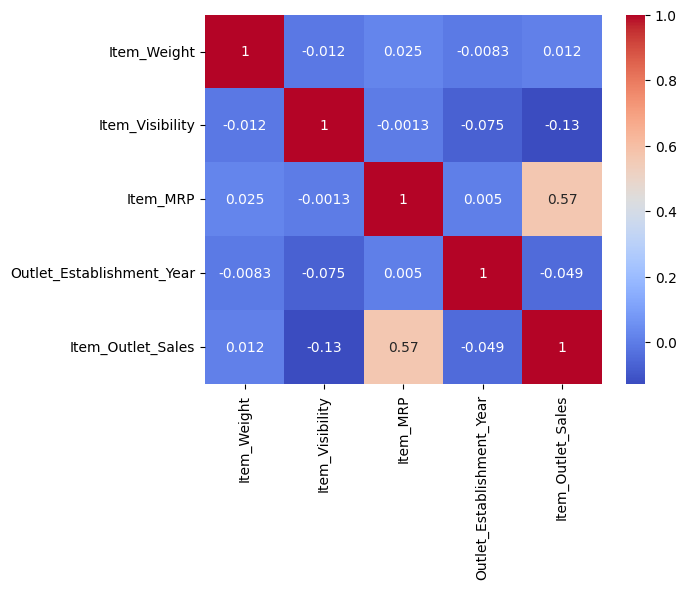

In [47]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#data preprocessing

In [43]:

data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [44]:
data.replace({'Item_Fat_Content':{'Low Fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [45]:
data['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [48]:
data['Item_Identifier']=le.fit_transform(data['Item_Identifier'])


In [49]:
data['Outlet_Identifier']=le.fit_transform(data['Outlet_Identifier'])

In [50]:
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])


In [51]:
data['Item_Type']=le.fit_transform(data['Item_Type'])


In [52]:
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])


In [53]:
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])


In [54]:
data['Outlet_Type']=le.fit_transform(data['Outlet_Type'])

In [55]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [56]:
#splitting data /independent and dependent

In [57]:
X=data.drop(columns='Item_Outlet_Sales',axis=1) #features
Y=data['Item_Outlet_Sales']                     #target

In [58]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [59]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [60]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [61]:
X.shape,X_train.shape,X_test.shape

((8523, 11), (6818, 11), (1705, 11))

# machine learning model


In [62]:
from xgboost import XGBRegressor

In [63]:
regressor=XGBRegressor()

In [64]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
#evalution
#prediction of training data

In [65]:
training_data_prediction=regressor.predict(X_train)

In [66]:
from sklearn import metrics

In [67]:
# R squares value
r2_train =metrics.r2_score(Y_train,training_data_prediction)

In [68]:
print('R squared value=',r2_train)

R squared value= 0.8601968169888748


In [69]:
#prediction on test data
test_data_prediction=regressor.predict(X_test)

In [70]:
r2_test=metrics.r2_score(Y_test,test_data_prediction)

In [71]:
print('R Squared value=',r2_test)

R Squared value= 0.5590271135742968


# linear regression

In [72]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [73]:
lr.fit(X_train,Y_train)

LinearRegression()

In [74]:
print(lr.score(X_test,Y_test))

0.5437444883101101


In [95]:
training_data_predict=lr.predict(X_train)

In [81]:
r2_train=metrics.r2_score(Y_train,training_data_predict)

In [82]:
print('R Squared value=',r2_train)

R Squared value= 0.5016151239901071


In [83]:
test_data_predict=lr.predict(X_test)

In [84]:
r2_test=metrics.r2_score(Y_test,test_data_predict)

In [85]:
print('R Squared value=',r2_test)

R Squared value= 0.5437444883101101
